In [10]:
#https://www.kaggle.com/code/sejalkshirsagar/aicvs-flower-classification-cnn-keras
import os
import numpy as np # linear algebra

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Activation, Dense

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.0


In [11]:
IMAGE_DIM = 224,224
CLASSES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
src = './flowers/train'
train = []

for i in CLASSES:
    path = os.path.join(src,i)
    idx = CLASSES.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, IMAGE_DIM)
            train.append([img_array, idx])
            
X=[] #Training images
y=[] #labels
for i,j in train:
    X.append(i)
    y.append(j)

len(X), len(y)

(3452, 3452)

In [12]:
#Reshaping & Normalizing
X = np.array(X).reshape(-1,*IMAGE_DIM,3)/255.0

#OneHotEncoding
y = to_categorical(y)

#Spliting train data into training & validation sets
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 9)

np.shape(x_train), np.shape(y_train), np.shape(x_valid), np.shape(y_valid)

((2761, 224, 224, 3), (2761, 5), (691, 224, 224, 3), (691, 5))

In [13]:
src = './flowers/test'
X_test = []
filenames = []
for i in CLASSES:
    path = os.path.join(src,i)
    idx = CLASSES.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, IMAGE_DIM)
            filenames.append(img)
            X_test.append(img_array)
        
#Reshaping & Normalizing
X_test = np.array(X_test).reshape(-1,*IMAGE_DIM,3)/255.0

np.shape(X_test)

(865, 224, 224, 3)

In [14]:
datagen = ImageDataGenerator(
            featurewise_center = False,  # set input mean to 0 over the dataset
            samplewise_center = False,  # set each sample mean to 0
            featurewise_std_normalization = False,  # divide inputs by std of the dataset
            samplewise_std_normalization = False,  # divide each input by its std
            zca_whitening = False,  # apply ZCA whitening
            rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image 
            width_shift_range = 0.2,  # randomly shift images horizontally (fraction of total width)
            height_shift_range = 0.2,  # randomly shift images vertically (fraction of total height)
            horizontal_flip = True,  # randomly flip images
            vertical_flip = False )  # randomly flip images

datagen.fit(x_train)

In [15]:
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))  
vgg.trainable = False
x = vgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
y = Dense(5, activation="softmax")(x)
	
my_model = Model(inputs=vgg.input, outputs=y)
my_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [16]:
my_model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
#from tensorflow.keras import backend as K
#K.clear_session()

In [18]:
EPOCHS = 10
BATCH_SIZE = 64
NUM_TRAINING_IMAGES = x_train.shape[0]
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

history = my_model.fit(datagen.flow(x_train, y_train, batch_size = BATCH_SIZE),
                        epochs = EPOCHS, verbose = 1, 
                        validation_data = (x_valid,y_valid),
                        steps_per_epoch = STEPS_PER_EPOCH)

Epoch 1/35
43/43 [==============================] - 29s 580ms/step - loss: 6.0387 - accuracy: 0.4438 - val_loss: 0.9296 - val_accuracy: 0.6729
Epoch 2/35
43/43 [==============================] - 21s 498ms/step - loss: 0.7018 - accuracy: 0.7445 - val_loss: 0.6362 - val_accuracy: 0.7656
Epoch 3/35
43/43 [==============================] - 22s 504ms/step - loss: 0.5660 - accuracy: 0.7864 - val_loss: 0.6146 - val_accuracy: 0.7902
Epoch 4/35
43/43 [==============================] - 22s 501ms/step - loss: 0.5513 - accuracy: 0.7998 - val_loss: 0.5647 - val_accuracy: 0.8061
Epoch 5/35
43/43 [==============================] - 22s 504ms/step - loss: 0.4695 - accuracy: 0.8369 - val_loss: 0.6068 - val_accuracy: 0.7902
Epoch 6/35
43/43 [==============================] - 23s 521ms/step - loss: 0.4388 - accuracy: 0.8428 - val_loss: 0.5221 - val_accuracy: 0.8278
Epoch 7/35
43/43 [==============================] - 22s 510ms/step - loss: 0.4016 - accuracy: 0.8539 - val_loss: 0.5792 - val_accuracy: 0.8075

In [21]:
results = my_model.evaluate(x_valid, y_valid, batch_size = BATCH_SIZE)
print("Validation loss, accuracy:", results)

11/11 [==============================] - 2s 188ms/step - loss: 0.6057 - accuracy: 0.8321
Validation loss, accuracy: [0.6057178378105164, 0.8321273326873779]


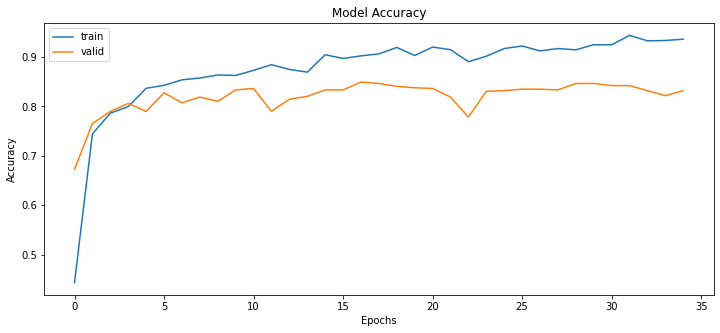

In [23]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

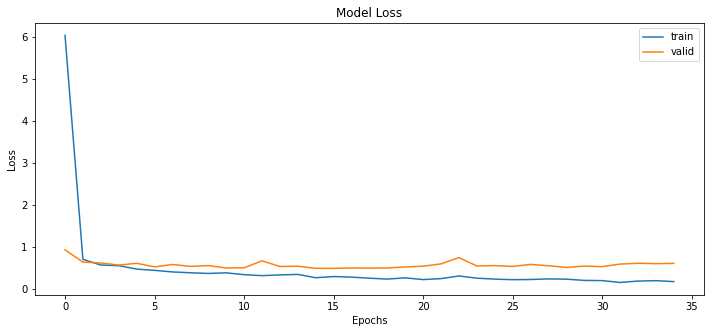

In [24]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()